# Dependencies

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# Creating/Cleaning Training Data

In [37]:
training_df = pd.read_csv('training_data.csv', index_col=0)

training_df['Buy'] = ""
buy_classification = ['buy', 'outperform', 'positive']

for index, row in training_df.iterrows():
    ticker = row['Ticker']
    analyst_suggestions = pd.read_csv('../Data_Collection/Scrapers/Final_Analyst_Rating.csv', index_col=0)
    for inner_index, inner_row in analyst_suggestions.iterrows():
        if analyst_suggestions.at[inner_index, 'Ticker'] == ticker:
            if analyst_suggestions.at[inner_index, 'Rating'].lower() in buy_classification:
                training_df.at[index, 'Buy'] = 1
            else:
                training_df.at[index, 'Buy'] = 0

# Scaling the data
Scaler = MinMaxScaler()
cols = [x for x in training_df.columns if x not in ['Buy', 'Ticker']]
training_df[cols] = Scaler.fit_transform(training_df[cols])
training_df = training_df.dropna(axis=0)

training_df

,Ticker,Conversations,Headlines,payoutRatio,beta,regularMarketVolume,profitMargins,52WeekChange,forwardEps,bookValue,...,heldPercentInsiders,mostRecentQuarter,nextFiscalYearEnd,shortRatio,enterpriseValue,earningsQuarterlyGrowth,sharesShortPriorMonth,shortPercentOfFloat,pegRatio,Buy
0,NVDA,0.424561,0.892070,0.128478,0.591948,0.052327,0.943654,0.184837,0.178523,0.071583,...,0.208158,0.562500,1.000000,0.077273,0.139727,0.421810,0.034314,0.079612,0.007925,1
1,MSFT,0.729825,0.378855,0.431261,0.214261,0.258086,0.996943,0.090959,0.093979,0.040912,...,0.001503,0.078125,0.122449,0.386364,0.841075,0.365071,0.376497,0.000000,0.010038,1
2,TSLA,0.533333,0.555066,0.000000,1.000000,0.331638,0.775201,1.000000,0.062197,0.059005,...,1.000000,0.078125,0.873469,0.490909,0.296855,0.709383,0.447375,1.000000,0.028119,1
3,AAPL,0.800000,0.665198,0.301398,0.490618,1.000000,0.913480,0.163087,0.051769,0.000000,...,0.001804,0.000000,0.481633,0.209091,1.000000,0.355660,0.804040,0.009709,0.009862,1
4,GOOGL,0.445614,0.389868,0.000000,0.331969,0.000000,0.915805,0.135370,1.000000,1.000000,...,0.004660,0.078125,0.873469,0.490909,0.606609,0.392748,0.000000,0.091262,0.009099,1
5,FB,0.287719,0.387665,0.000000,0.491982,0.241268,1.000000,0.136918,0.161763,0.126191,...,0.030216,0.078125,0.873469,0.363636,0.365047,0.420426,0.184465,0.095146,0.005753,1
6,JNJ,0.473684,0.801762,1.000000,0.150461,0.042018,0.885624,0.052244,0.121167,0.061726,...,0.002606,0.125000,0.885714,0.536364,0.193772,0.117631,0.115055,0.005825,0.016730,0
7,VZ,0.385965,0.563877,0.800083,0.000000,0.172179,0.857597,0.012089,0.058101,0.038256,...,0.000000,0.078125,0.873469,0.754545,0.159684,0.246886,0.352190,0.114563,0.019313,1
10,CSCO,0.031579,0.325991,0.834141,0.275674,0.246174,0.908902,0.038614,0.036002,0.016373,...,0.001503,0.437500,0.224490,0.709091,0.074272,0.242458,0.405601,0.095146,0.012562,0
11,PYPL,0.694737,1.000000,0.000000,0.427158,0.031599,0.898201,0.261882,0.064929,0.040365,...,0.003808,0.078125,0.873469,0.263636,0.117848,0.853308,0.116768,0.106796,0.012856,1


# Training the model

In [38]:
LR = LogisticRegression()
training_cols = [x for x in training_df.columns if x not in ['Buy', 'Ticker']]

X_train = training_df[training_cols]
y_train = training_df['Buy']
y_train = y_train.astype('int')

LR = LR.fit(X_train, y_train)
y_predictions = LR.predict(X_train)

print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.75      1.00      0.86        12

    accuracy                           0.78        18
   macro avg       0.88      0.67      0.68        18
weighted avg       0.83      0.78      0.74        18



In [39]:
data = training_df
data = data.drop(['Ticker'],axis = 1)
X = data.loc[:, data.columns != 'A']
y = data.iloc[:,-1:]
y = y.astype('int')

# Feature Selection

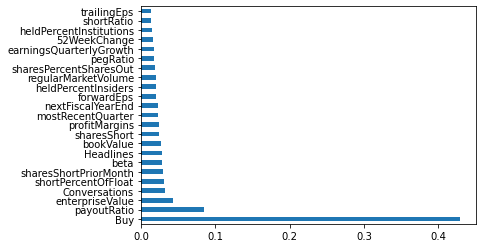

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(24).plot(kind = 'barh')
plt.show()